## Introduction

If you've had any experience with the python scientific stack, you've probably come into contact with, or at least heard of, the [pandas][1] data analysis library. Before the introduction of pandas, if you were to ask anyone what language to learn as a budding data scientist, most would've likely said the [R statistical programming language][2]. With its [data frame][3] data structure, it was the obvious winner when it came to filtering, slicing, aggregating, or analyzing your data. However, with the introduction of pandas to python's growing set of data analysis libraries, the gap between the two langauges has effectively closed, and as a result, pandas has become a vital tool for data scientists using python.

While we won't be covering the pandas library itself, since that's a topic fit for a course of its own, in this lesson we will be discussing the simple interface pandas provides for interacting with the matplotlib library. In addition, we'll also take a look at the recent changes the matplotlib team has made to make it possible for the two libraries to work together more harmoniously.

That said, let's get set up and see what pandas has to offer.

[1]: http://pandas.pydata.org/
[2]: https://www.r-project.org/
[3]: https://cran.r-project.org/doc/manuals/r-release/R-intro.html#Data-frames

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

### What is pandas?

Pandas is a library created by [Wes McKinney][1] that provides several data structures that make working with data fast, efficient, and easy. Chief among them is the `DataFrame`, which takes on R's `data.frame` data type, and in many scenarios, bests it. It also provides a simple wrapper around the `pyplot` interface, allowing you to plot the data in your `DataFrame` objects without any context switching in many cases. 

But, enough talk, let's see it in action.

[1]: https://twitter.com/wesmckinn

### Import the Library

The following bit of code imports the pandas library using the widely accepted `pd` naming convention. You'll likely see pandas imported like this just about everywhere it's used, and it is recommended that you always use the same naming convention in your code as well.

In [2]:
import pandas as pd

### Load in Some Data

In the next cell, we'll use the `read_csv` function to load in the [Census Income][1] dataset from the [UCI Machine Learning Repository][2]. Incidentally, this is the exact same dataset that we used in our Exploratory Data Analysis (EDA) example in chapter 2, so we'll get to see some examples of how we could perform some of the same steps using the plotting commands on our `DataFrame` object.  

[1]: http://archive.ics.uci.edu/ml/datasets/Adult
[2]: http://archive.ics.uci.edu/ml/index.html

In [3]:
import pandas as pd

# Download and read in the data from the UCI Machine Learning Repository
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                 header=None,
                 names=('age', 
                        'workclass', 
                        'fnlwgt', 
                        'education', 
                        'education_num', 
                        'marital_status', 
                        'occupation', 
                        'relationship', 
                        'race', 
                        'sex', 
                        'capital_gain', 
                        'capital_loss', 
                        'hours_per_week', 
                        'native_country', 
                        'target'))

### Plotting With pandas

Just like we did in our EDA example from chapter 2, we can once again create a simple histogram from our data. This time though, notice that we simply call the `hist` command on the column that contains the education level to plot our data.

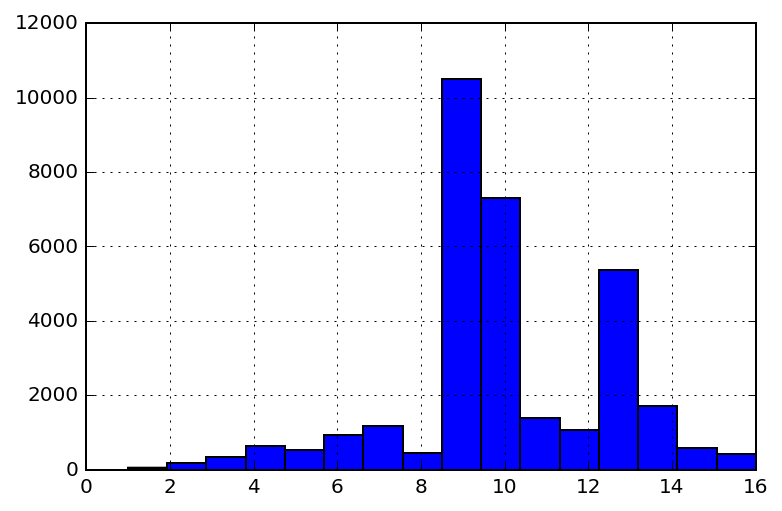

In [4]:
df.education_num.hist(bins=16);

And, remember, pandas isn't doing anything magical here, it's just providing a very simple wrapper around the `pyplot` module. At the end of the day, the code above is simply calling the `pyplot.hist` function to create the histogram. So, we can interact with the plot that it produces the same way we would any other plot. As an example, let's create our histogram again, but this time let's get rid of that empty bar to the left by setting the plot's x-axis limits using the `pyplot.xlim` function.

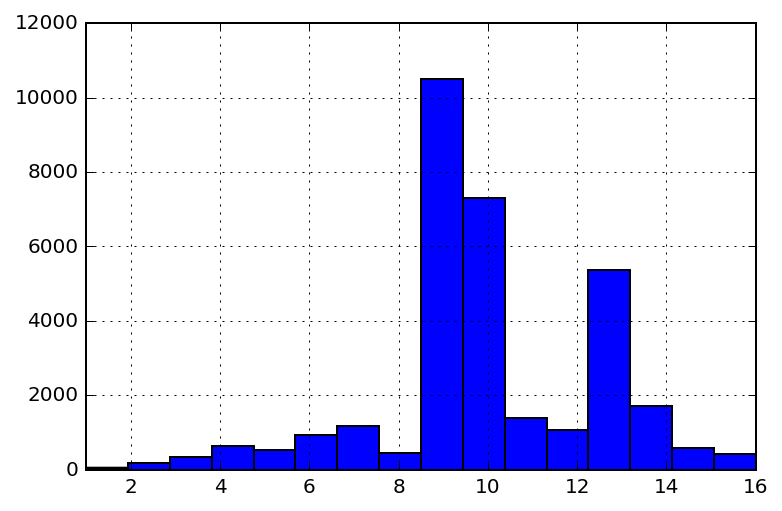

In [5]:
df.education_num.hist(bins=16)
# Remove the empty bar from the histogram that's below the 
# education_num's minimum value.
plt.xlim(df.education_num.min(), df.education_num.max());

Well, that looks better, but we're still stuck with many of the same problems that we had in the original EDA lesson. You'll notice that most of the x-ticks don't actually line up with their bars, and there's a good reason for that. Remember, in that lesson, we discussed how a histogram was meant to be used with continuous data, and in our case we're dealing with discrete values. So, a bar chart is actually what we want to use here.

Luckily, pandas makes the task of creating the bar chart even easier. In our EDA lesson, we had to do the frequency count ourselves, and take care of lining the x-axis labels up properly, and several other small issues. With pandas, it's just a single line of code. First, we call the `value_counts` function on the `education` column to get a set of frequency counts, ordered largest to smallest, for each education level. Then, we call the `plot` function on the `Series` object returned from `value_counts`, and pass in the type of plot with the `kind` parameter, and while we're at it, we'll set our width to 1, like we did in the chapter 2 example, to make it look more histogram-ish.

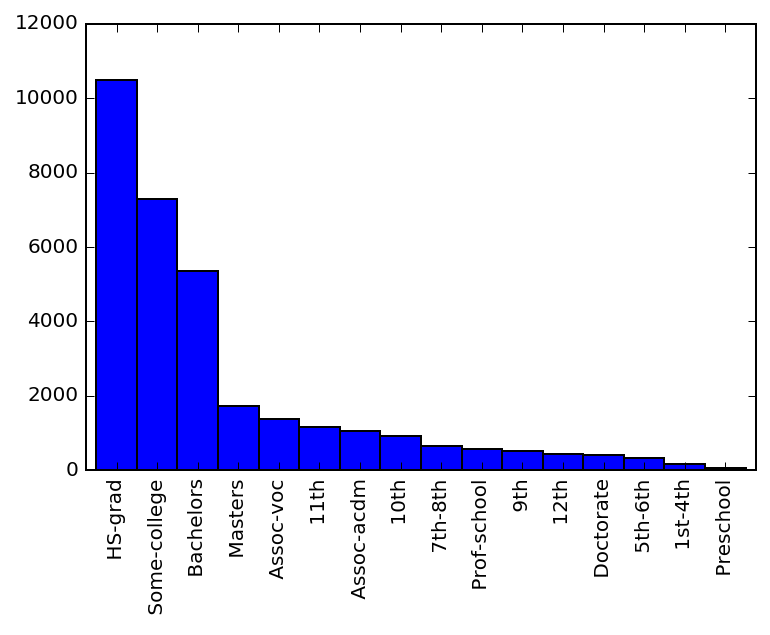

In [6]:
df.education.value_counts().plot(kind='bar', width=1);

Now, rather than passing in the plot type with the `kind` parameter, we could've also just called the `bar` function from the `plot` object, like we do in the next cell.

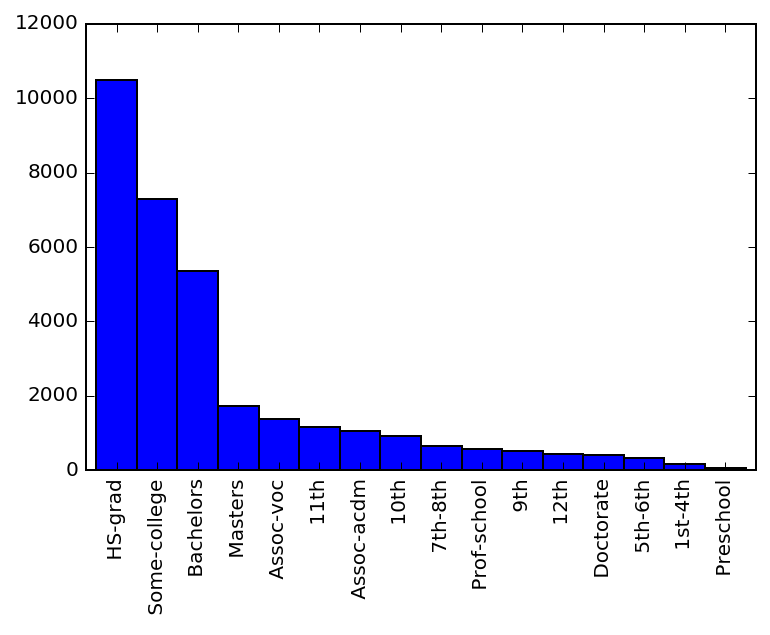

In [7]:
df.education.value_counts().plot.bar(width=1);

Ok, so that's a pretty good introduction to the simple interface that pandas provides to the matplotlib library, but it doesn't stop there. Pandas also provides a handful of more complex plotting functions in the `pandas.tools.plotting` module. So, let's import another dataset and take a look at an example of what's available. 

In the cell below, we pull in the Iris dataset that we used in our scatterplot matrix example from chapter 3. Incidentally, if you don't want to mess with network connections, or if you happen to be in a situation where network access just isn't an option, I've copied the data file to the local data folder. The file can be found at  `./data/iris_data.csv`

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/pydata/pandas/master/pandas/tests/data/iris.csv')

We'll need a color map, essentially just a dictionary mapping each species to a unique color, so we'll put one together in the next cell. Fortunately, pandas makes it easy to get the species names by simply calling the `unique` function on the `Name` column.

In [9]:
names = df.Name.unique()
colors = ['red', 'green', 'blue']
cmap = dict(zip(names, colors))

Now, before we take a look at one of the functions from the `plotting` module, let's quickly take a look at one of the [changes that was made to matplotlib in version 1.5][1] to accommodate labeled data, like a pandas `DataFrame` for example. The code in the next cell, creates a scatter plot using the `pyplot.scatter` function, like we've done in the past, but notice how we specify the columns that contain our `x` and `y` values. In our example below, we are simply passing in the names of the columns alongside the `DataFrame` object itself. Now, it's arguable just how much more readable this light layer of abstraction is over just passing in the data directly, but it's nice to have the option, nonetheless.

[1]: http://matplotlib.org/users/whats_new.html#working-with-labeled-data-like-pandas-dataframes

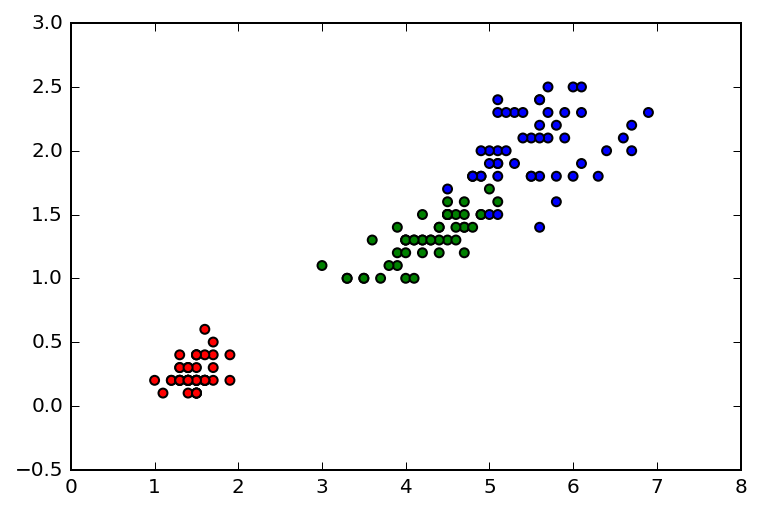

In [10]:
plt.scatter(x='PetalLength', y='PetalWidth', data=df, c=df.Name.apply(lambda name: cmap[name]));

Now, we're ready to take a look at one of the functions that pandas provides us, and for comparison sake, let's take a look at our old friend, the scatterplot matrix. In the next cell, we'll import the `scatter_matrix` function from the `pandas.tools.plotting` module and run it on the Iris dataset.

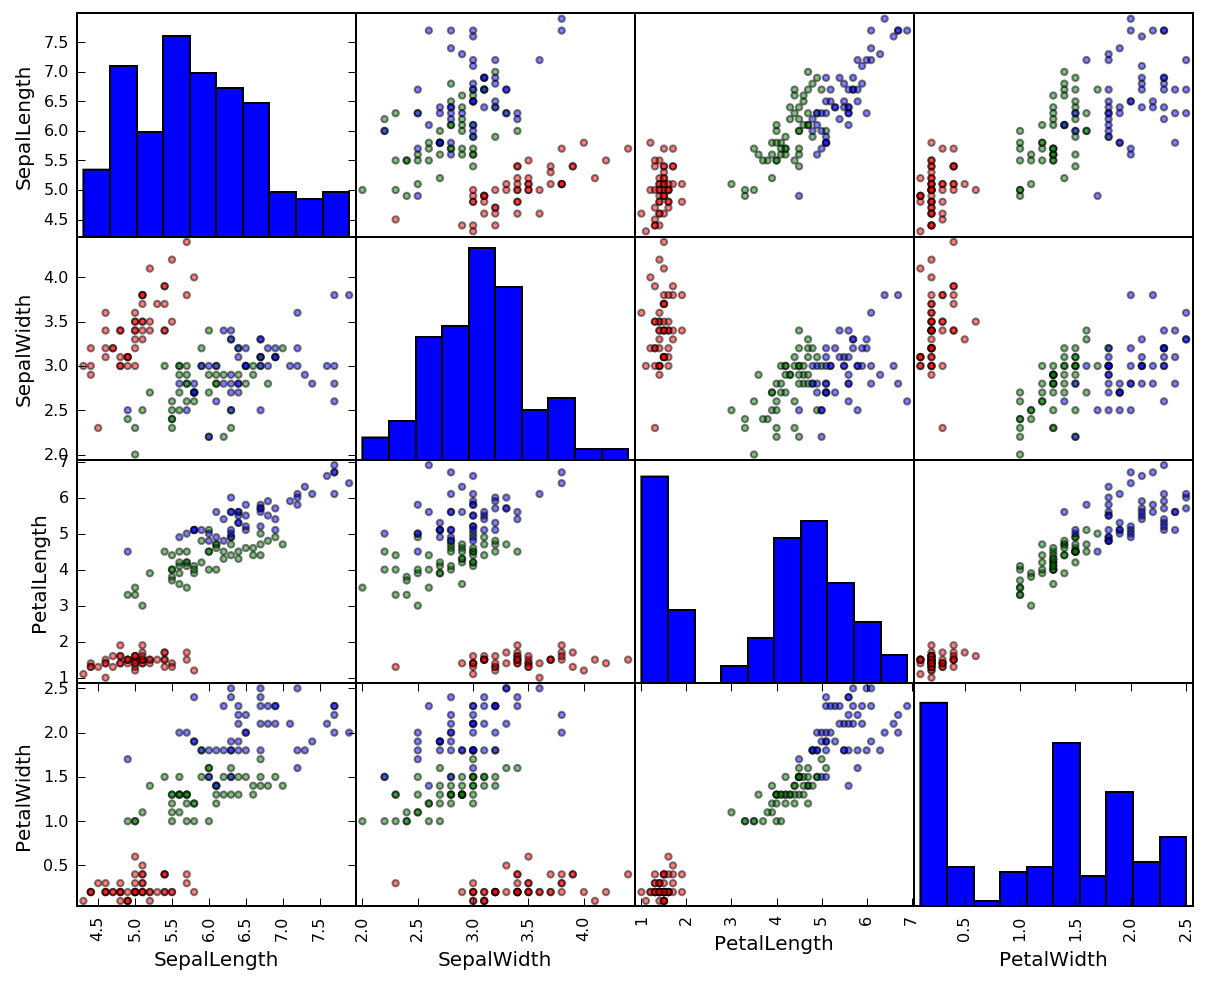

In [11]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, figsize=(10,8), c=df.Name.apply(lambda name: cmap[name]), s=40);

Well, that looks pretty good, and it's a heck of a lot easier than writing our own. Though, I prefer the seaborn version, this one will do in a pinch. If you get a chance, I recommend taking a look at what the pandas `plotting` module has to offer. Aside from the scatterplot matrix function, it also provides functions for creating things like density plots and parallel coordinates plots. It's not as powerful as the seaborn library, but many times it may be all you need to perform your analysis.

## Conclusion

And, that will bring us to the end once again.

To recap, in this lesson, we saw some quick examples of how to use the Pandas data analysis library with the matplotlib library. Specifically, we saw a few examples of the simple interface that pandas provides to the `pyplot` module, and we also saw one example of the new labeled data change that was made to matplotlib in version 1.5. Finally, we took a quick look at one of the more complex functions that the pandas `plotting` module provides.

The main goal of this lesson wasn't to turn you into a pandas power user, but rather to give you some idea of what pandas provides, and more importantly, to take away any of the mystery of how it works. Now that you understand that pandas is basically just providing a very simple layer of abstraction on top of the `pyplot` interface, you should be prepared to deal with any issues that come up when plotting the data in your `DataFrame` objects.